## Deployment Patterns - an iterative process
Different cases call for different patterns
- New feature/function/capability, i.e. no benchmark: capability to start with a smaller traffic and then ramp up
- Replacing Human/Automation, i.e. benchmark available: 
    - run the new system in parallel with the benchmark first
    - inspect the examples where new model and benchmark differ (which can be valuable for further improvement)
    - again roll out in small steps

Think of deployment of ML algorithm as a spectrum along human only, shadow mode, AI assistance, partial automation and full automation, rather than a 0-1 classification. The level of automation depends on the use case. For example, quick internet search may be infeasible or costly to keep human in the loop, while in financial market applications, concept drifts render it necessary for human to override.

Some common best practices in deployment.
- Always be able to ramp up or down gradually, with monitoring and QC.
- Build fallback or guardrails, including the ability to rollback/roll out different models quickly
- Somehow related to above, modulize the data pipeline and model deployment.
- Ability to replay or backtest historical data to debug issues (maybe more a data pipeline issue)

## Checklist of questions for software engineering issues
- Realtime or Batch: in both training and prediction
- Cloud vs. Edge/Browser
- Computing resources difference between research and deployment: hardware resources, ML package dependencies
- Latency, throughputs: understood as whether the prediction speed suits your need
- Logging
- Security, privacy and ethical considerations.

## Metrics to Monitor in prod
It ususally takes a few tries to converge to the right set of metrics to monitor: try it out in small traffic first and take into account expert or domain knowledge.
- Software metrics
    - cost: memory, compute power, server load
    - latency: starting from sending data to server, performing inference using model and returning response
    - throughput: number of successful requests served per unit time
    - auditability
- Input metrics - helping you understand the distribution of $X$ and $y|X$, to guard against domain shifts and/or corrupted input data. Note that not only the top-level statistics, but also slices/tags of data that is relevant (again domain knowledge can be of help here).
    - number of missing values, 
    - descriptive statistics or characteristics of features, 
    - serving data distribution vs training data distribution
    - negative feedback loop: when models are automatically trained on data collected during production, and thus subject to adversial attacks by malice users
- Output metrics - helping you understand the general health of the machine learning system and guard against model decay: 
    - frequency of null output, 
    - output breaching guardrails, 
    - metrics on the viability of the ML algo (e.g. accuracy or MSE)
    - model version

Tensorflow Model Analysis might provide useful tools for this, as well as `neptune`, Tensorflow data validation and scikit-multiflow library (have not tried them out yet).

## Serving as a web application with a managed service

Model serving is essentially running ML inference in production. Issues that need consideration are grabbing necessary data, communicating with user, model storage, versioning and computation.

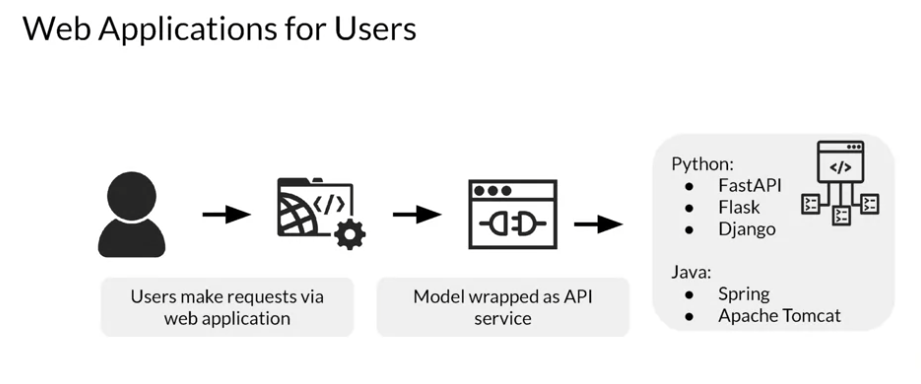

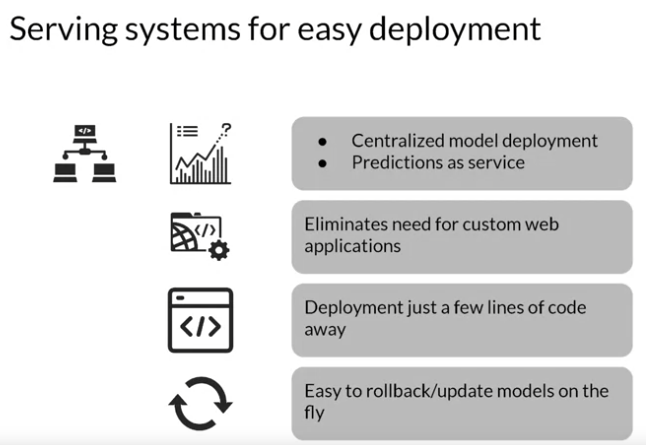

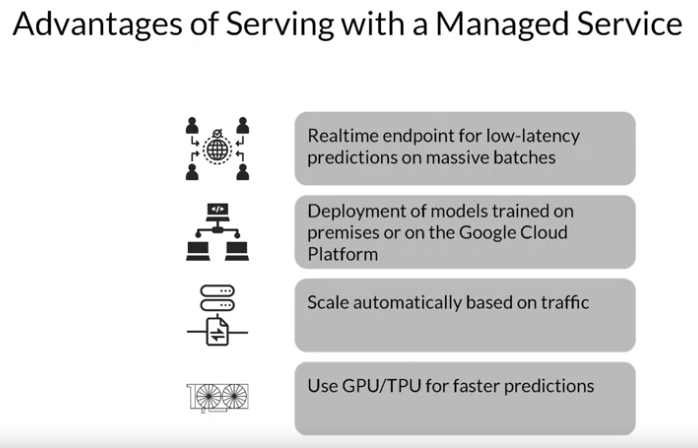

## Some Model Serving Framework

[Tensorflow Serving](https://www.tensorflow.org/tfx/serving/architecture).

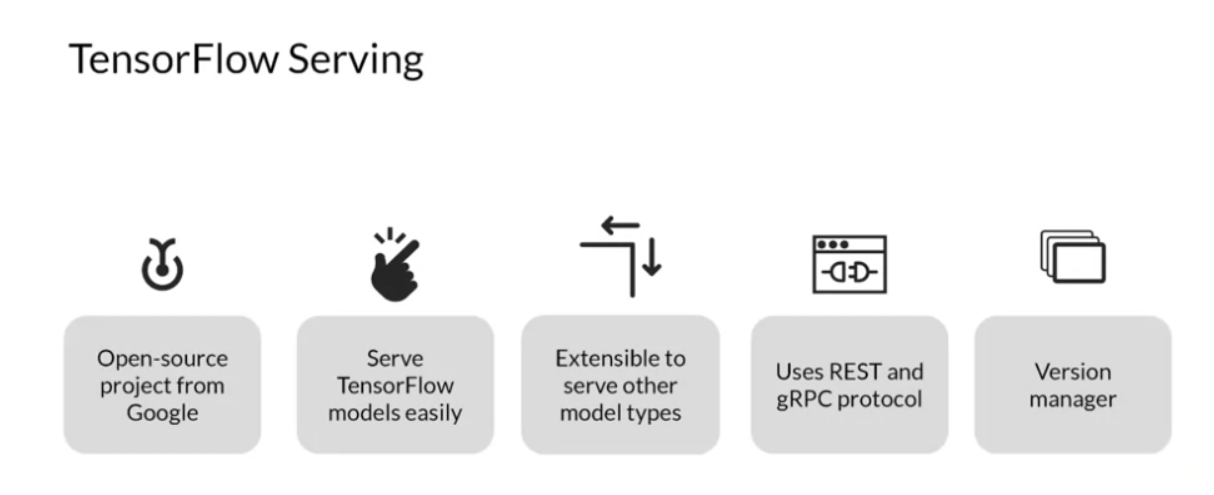

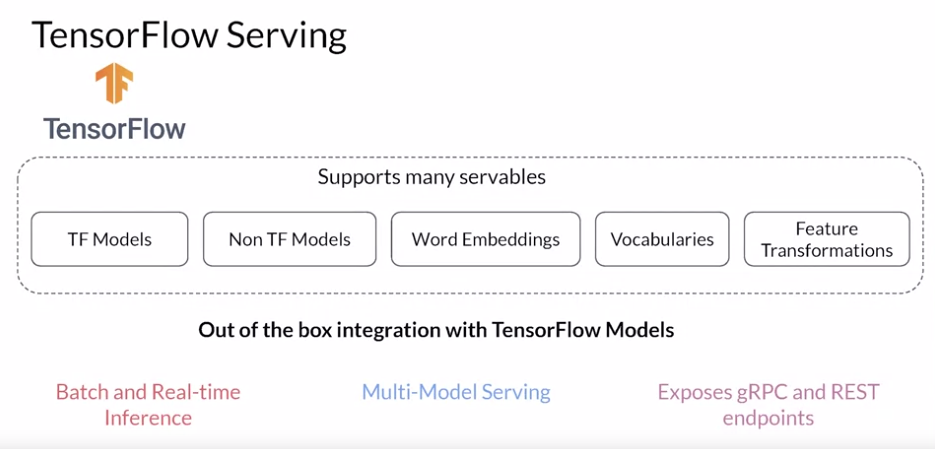

Another popular model serving open-source framework is [TorchServe](https://github.com/pytorch/serve)

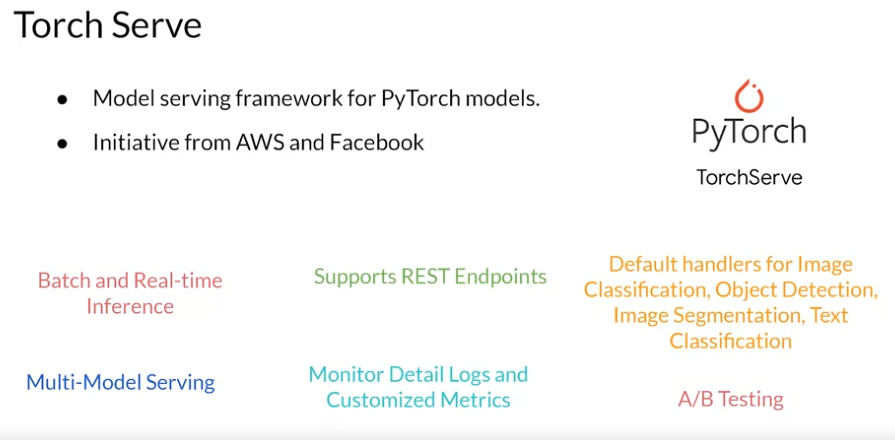

## Containerization

Containerization is the way to perform **horizontal scaling**, so that capacity and computing resource can scale up and down elastically without taking the app offline. There are many vendors offering cloud platforms that allow you to scale hotizontally. Three things to keep an eye on:
- Can I manually scale? Say for example, what if I want any instance of the VM.
- Can I scale programmatically via the app?
- How aggresive is the system at spinning up and down based on need?

The virtual machine architecture is where the apps can still run on binary library within an operating system. But contrary to a physical machine, the operating system does not run on hardare and instead it runs on a virtual machine that no hardware.  This VM is managed by a hypervisor which acts as the manager of the virtual machines, each with its own operating system, bin and apps of its own. It is easy to see that the duplicated operating systems are somewhat of a waste. That is an advantage of **containers** which is shown in the next graph.

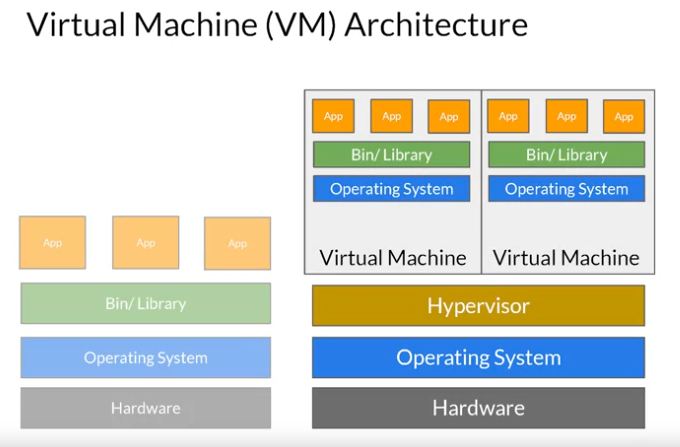

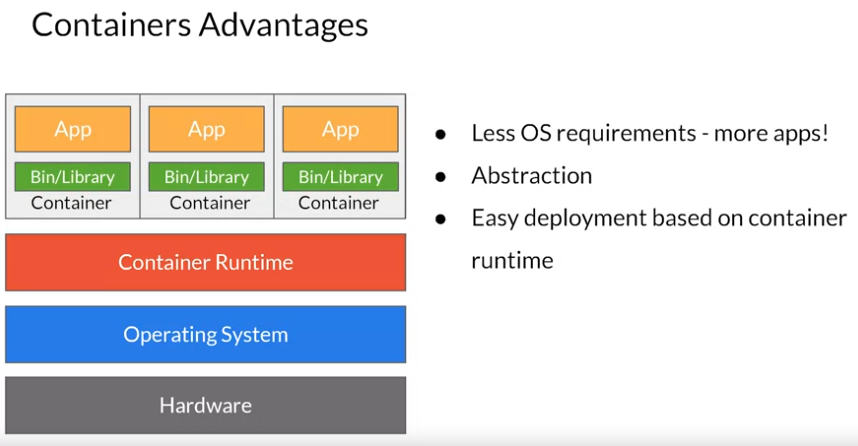

Docker is one famous container runtime.

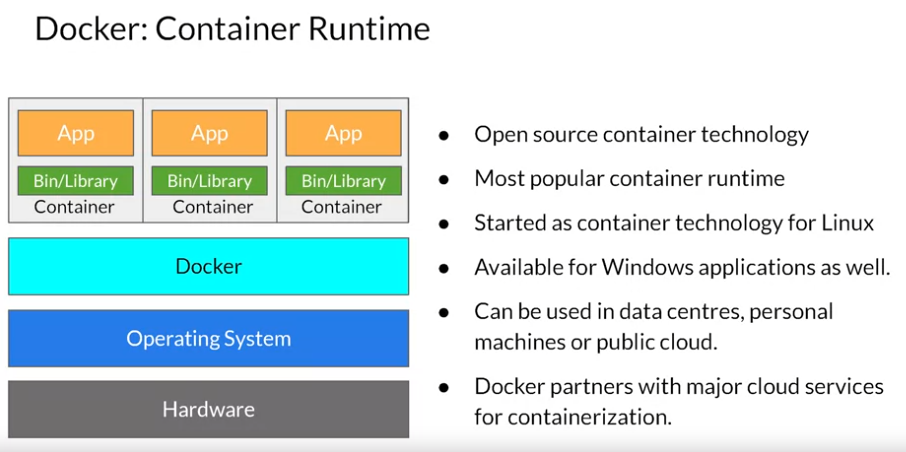

**Container orchestration** is a set of tools to do things like managing the lifecycle of containers, including their scaling. On top of your container manager, container orchestration generally gives multiple services such as 
- **resource management** to ensure that the containers aren't overallocating hardware resources, 
- **scheduling** so that containers meet up and downtime requirements and of course, 
- **general service management** so you can manage how the orchestration environment does its job.

One of the most famous container orchestration tool is [Kubernetes](https://kubernetes.io/).

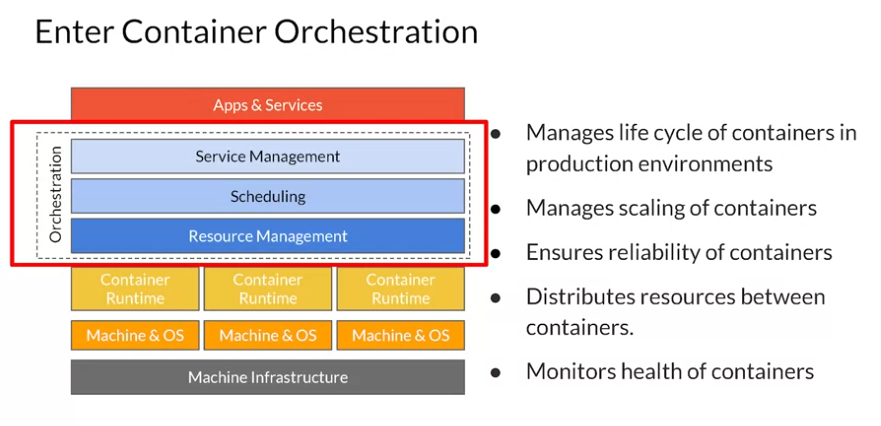

## Tracing for ML Systems

Tracing ML systems become harder for distributed and micro-service based applications. To properly inspect and debug issues with latency for requests in distributed systems, you need to understand the sequencing and parallelism of the services and the latency contribution of each to the final latency of the system. To address this problem, Google developed the distributed tracing system, Dapper, to instrument and analyze its production services. Dapper quickly becomes an open-source standard (have not tried it out yet).

## References
- [Introduction to Machine Learning in Production](https://www.coursera.org/learn/introduction-to-machine-learning-in-production?specialization=machine-learning-engineering-for-production-mlops)
- [Deploying Machine Learning Models in Production: Model Serving Architecture](https://www.coursera.org/learn/deploying-machine-learning-models-in-production/quiz/Y1GEJ/model-serving-architecture)
- [Deploying Machine Learning Models in Production: Scaling Infrastructure](https://www.coursera.org/learn/deploying-machine-learning-models-in-production/quiz/7BCNB/scaling-infrastructure)
- [Deploying Machine Learning Models in Production: Model Monitoring and Logging](https://www.coursera.org/learn/deploying-machine-learning-models-in-production/quiz/TNzTz/model-monitoring-and-logging)